<center><h1><b> Convolution Neural Network Handwritten Digits Classification</b1></h1></center>
    <center><h2>Padding & Strides</h2></center>

Use CNN to do handwritten digits classification using MNIST dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test)  = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
len(X_test)

10000

In [7]:
X_test.shape

(10000, 28, 28)

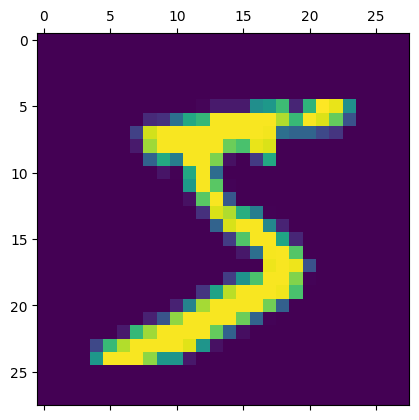

In [8]:
plt.matshow(X_train[0]);

In [9]:
# Scaling the data with the highest possible value in the data
X_train = X_train/255
X_test = X_test/255

### X_train Flattening i.e changing from 2 dimesion to 1 dimesion

In [10]:
X_train_flat = X_train.reshape(len(X_train), 28*28)  # 28 * 28 is the 2d dimension of the image

In [11]:
X_train_flat.shape

(60000, 784)

In [12]:
X_test_flat = X_test.reshape(len(X_test), 28 * 28)
X_test_flat.shape

(10000, 784)

In [13]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
# Neural Network definning
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])  # Sequential means layers will be stacked. Dense means all layers in the input (784) are connected with all layers in output(10)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# This will compile the neural network
model.compile(optimizer='adam',  # It allows efficient training
              loss='sparse_categorical_crossentropy', # This is used because the output is categorical. there are other options that can be used
              metrics=['accuracy']
             )

In [16]:
# Buildig the model
model.fit(X_train_flat, y_train, epochs=5) # epochs mean number of iteration the neural network will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8143 - loss: 0.7155
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9121 - loss: 0.3121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9224 - loss: 0.2746
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.2672


In [17]:
# Evaluatig the accuracy of the model on test dataset
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9127 - loss: 0.3043


[0.26720529794692993, 0.9241999983787537]

## Convolution Neural Network

In [18]:
# converting y_train and y_test to 1 dimension
y_train = y_train.reshape(-1,) 
y_test = y_test.reshape(-1,)

In [19]:
# Converting y_train to 1 dimension
y_train = y_train.reshape(-1,)  # -1 is used in order not to chage the dimension 
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
X_test.shape

(10000, 28, 28)

In [21]:
cnn = models.Sequential([
    # CNN first layer
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(filters = 28, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # CNN second layer
    layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(56, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.8785 - loss: 0.3779
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9830 - loss: 0.0527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9894 - loss: 0.0354
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9914 - loss: 0.0270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9934 - loss: 0.0198
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9958 - loss: 0.0117
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9964 - loss: 0.0114
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9970 - loss: 0.0091
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9982 - loss: 0.0062


## CNN Model Evaluation

In [22]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9863 - loss: 0.0585


[0.04315446689724922, 0.9900000095367432]

## CNN Model Prediction

In [23]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [24]:
y_pred[:5]

array([[2.37905085e-10, 1.08185105e-09, 7.84000143e-10, 1.38251153e-08,
        2.52867483e-09, 1.69596226e-10, 1.38384762e-14, 9.99999940e-01,
        5.62656755e-10, 1.86013143e-08],
       [1.14098925e-10, 3.54881613e-09, 9.99999940e-01, 1.56915217e-10,
        2.15525921e-13, 1.33749446e-15, 2.80949916e-12, 3.88526234e-12,
        4.35077321e-12, 2.53205135e-18],
       [4.12225916e-08, 9.99996841e-01, 4.38902381e-09, 2.02213205e-10,
        2.53714603e-07, 9.09643347e-08, 7.25798657e-07, 1.73067747e-06,
        5.91085794e-08, 1.16954260e-08],
       [9.99998987e-01, 3.46887584e-15, 9.36721273e-12, 9.44931796e-14,
        7.83933899e-13, 2.76859416e-12, 5.41242400e-07, 2.92648913e-12,
        8.92679930e-10, 3.51625971e-07],
       [1.30009978e-12, 7.70271208e-11, 4.95342378e-10, 2.73037767e-15,
        9.99980628e-01, 2.95475385e-12, 1.71418608e-11, 5.31696180e-11,
        1.46054040e-08, 1.93472388e-05]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]

y_classes[:5]

[7, 2, 1, 0, 4]

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Classification Report

In [27]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Confusion Matrix

In [28]:
# Converting probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

In [29]:
cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[ 976,    1,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   2,    0, 1027,    0,    0,    0,    0,    3,    0,    0],
       [   0,    1,    5,  995,    0,    6,    0,    1,    2,    0],
       [   1,    1,    1,    0,  969,    0,    1,    1,    1,    7],
       [   0,    0,    0,    4,    0,  886,    1,    0,    1,    0],
       [   2,    4,    0,    0,    1,    1,  950,    0,    0,    0],
       [   0,    3,    5,    0,    0,    0,    0, 1019,    1,    0],
       [   2,    1,    3,    1,    1,    2,    0,    2,  961,    1],
       [   0,    3,    1,    0,    4,    6,    0,    9,    3,  983]])

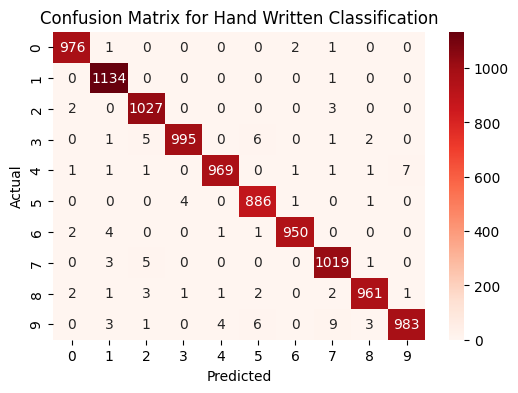

In [30]:
# Confusion Matrix visualization
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hand Written Classification');

# Padding and Stride Arguments

In [33]:
cnn1 = models.Sequential([
    # CNN first layer
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(filters = 28, kernel_size=(3,3), padding='same', strides=(2, 2), activation='relu'), # padding can be 'valid'
    layers.MaxPooling2D((2,2)),
    # CNN second layer
    layers.Conv2D(filters=56, kernel_size=(3,3), padding='same', strides=(2, 2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(56, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn1.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8052 - loss: 0.5919
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9668 - loss: 0.1063
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9763 - loss: 0.0751
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9816 - loss: 0.0563
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9858 - loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9881 - loss: 0.0379
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9895 - loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9915 - loss: 0.0263
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9925 - loss: 0.0231
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9942 - loss: 0.0180


In [34]:
cnn1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0523


[0.04287080839276314, 0.9861000180244446]